In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/5chScrape'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/5chScrape


In [2]:
import sqlite3
import pandas as pd

In [3]:
con = sqlite3.connect('5chScrape.db')

In [4]:
df_tables = pd.read_sql_query('select * from sqlite_master where type="table"', con)
df_tables

,type,name,tbl_name,rootpage,sql
0,table,thread_id_da9376ce_b844_4ae7_92a5_7b181bd43ebb,thread_id_da9376ce_b844_4ae7_92a5_7b181bd43ebb,2,CREATE TABLE thread_id_da9376ce_b844_4ae7_92a5...
1,table,threads,threads,6,"CREATE TABLE threads (id varchar(64), datetime..."
2,table,thread_id_14291a09_a7d9_4f17_84c4_e1f11f679b21,thread_id_14291a09_a7d9_4f17_84c4_e1f11f679b21,7,CREATE TABLE thread_id_14291a09_a7d9_4f17_84c4...
3,table,thread_id_eae6917b_30a0_4989_b8a7_d67ba456445f,thread_id_eae6917b_30a0_4989_b8a7_d67ba456445f,14,CREATE TABLE thread_id_eae6917b_30a0_4989_b8a7...
4,table,thread_id_955dd79c_6b92_4708_9f78_e0124773315e,thread_id_955dd79c_6b92_4708_9f78_e0124773315e,21,CREATE TABLE thread_id_955dd79c_6b92_4708_9f78...
...,...,...,...,...,...
9633,table,thread_id_60842aa8_6ecb_4e9e_9651_ade5dd7c85de,thread_id_60842aa8_6ecb_4e9e_9651_ade5dd7c85de,835417,CREATE TABLE thread_id_60842aa8_6ecb_4e9e_9651...
9634,table,thread_id_13689282_43f2_4022_b5ec_35ac45d8b76b,thread_id_13689282_43f2_4022_b5ec_35ac45d8b76b,835567,CREATE TABLE thread_id_13689282_43f2_4022_b5ec...
9635,table,thread_id_4b30d7b1_c11b_48a9_90a2_7addd3f99b88,thread_id_4b30d7b1_c11b_48a9_90a2_7addd3f99b88,835717,CREATE TABLE thread_id_4b30d7b1_c11b_48a9_90a2...
9636,table,thread_id_3cded7e2_53af_4ae6_aaaf_d601031e1b00,thread_id_3cded7e2_53af_4ae6_aaaf_d601031e1b00,835914,CREATE TABLE thread_id_3cded7e2_53af_4ae6_aaaf...


In [5]:
df_threads = pd.read_sql_query('SELECT * FROM threads ORDER BY title', con)
df_threads

,id,datetime,board,title,url,length
0,thread_id_8fceab14_27aa_4477_b637_ea3574fac081,2000-03-26 21:42:00,モーニング娘。,,https://1999.5ch.net/test/read.cgi/morning/954...,153
1,thread_id_159df802_c01f_4b34_b9e9_1e8a9468db20,2007-09-24 01:55:00,雑誌編集者,,https://2chplus.5ch.net/test/read.cgi/supportd...,319
2,thread_id_62405023_cce4_4cd4_b768_e3c635f10c7c,2004-01-14 14:04:00,AAサロン,,https://aa2.5ch.net/test/read.cgi/aasaloon/107...,333
3,thread_id_ed2e5465_65a1_4587_a6d1_97ea2022757f,2004-04-04 14:12:00,AAサロン,,https://aa3.5ch.net/test/read.cgi/aasaloon/108...,243
4,thread_id_3acfd686_4135_466f_8bb4_aa2866aba391,2003-03-08 10:05:00,AA長編,,https://aa3.5ch.net/test/read.cgi/aastory/1047...,685
...,...,...,...,...,...,...
9632,thread_id_81c38731_bf57_479b_b590_ea62610eabcf,2004-01-06 00:27:00,AAサロン,�d�jドライブ【52日目】,https://aa2.5ch.net/test/read.cgi/aasaloon/107...,1001
9633,thread_id_056b5070_a567_4f59_99d8_8361fdb32e72,2000-03-17 19:30:00,えっちねたロビー,�刀嚮ｴ宿や下北にいるようなオシャレな子のＨ画像下さい★��,https://1999.5ch.net/test/read.cgi/hneta/95328...,183
9634,thread_id_0454dc3f_1199_4edb_a0c8_1fb009094e4a,2004-04-06 13:03:00,AAサロン,�ﾎ,https://aa3.5ch.net/test/read.cgi/aasaloon/108...,108
9635,thread_id_26bb570c_cd6c_4cc7_954a_c89d110dd54e,2006-07-23 12:33:00,AAサロン,��,https://aa6.5ch.net/test/read.cgi/aasaloon/115...,107


In [6]:
df_thread = pd.read_sql_query('SELECT * FROM {} ORDER BY user'.format(df_threads['id'][0]), con)
df_thread

,idx,datetime,user,post
0,107,2000-03-26 22:05:00,101>100,同じこと言ってるな（笑）\n
1,136,2000-03-26 22:19:00,101>128,俺４人目。キムタク美容師なんだな。しゅうじっていうのか．．．\n
2,148,2000-03-26 22:25:00,132＞141,http://www.jbbs.net/2ch/test/read.cgi?bbs=morn...
3,141,2000-03-26 22:22:00,>139,さっきそれ踏んでシステムクラッシュしました。僕だけでしょうか？\n
4,57,2000-03-26 21:50:00,あぁ,ＴＢＳのドラマ録画終わるまでヒマだ... \n
...,...,...,...,...
148,149,2000-03-26 22:27:00,名無しさん,＞１４９ さんきうみてみるです\n
149,150,2000-03-26 22:29:00,名無しさん,＞１４９ 見てきました。TBSの人があのスレッドにいたのでしょうか・・・ ドラマの終わ...
150,152,2000-04-02 15:16:00,名無しさん,agee\n
151,138,2000-03-26 22:20:00,＞129,http://www.jbbs.net/2ch/test/read.cgi?bbs=morn...


In [7]:
df = pd.read_csv('threadURLList.csv', encoding='shift-jis')
df

,url,board
0,https://1999.5ch.net/test/read.cgi/575/960202638/,しりとり
1,https://1999.5ch.net/test/read.cgi/575/958913199/,しりとり
2,https://1999.5ch.net/test/read.cgi/575/958723308/,しりとり
3,https://1999.5ch.net/test/read.cgi/575/958608817/,しりとり
4,https://1999.5ch.net/test/read.cgi/575/958527842/,しりとり
...,...,...
3071501,https://yuzuru.5ch.net/test/read.cgi/yuzurutr/...,yuzuruゴミ箱
3071502,https://yuzuru.5ch.net/test/read.cgi/yuzurutr/...,yuzuruゴミ箱
3071503,https://yuzuru.5ch.net/test/read.cgi/yuzurutr/...,yuzuruゴミ箱
3071504,https://yuzuru.5ch.net/test/read.cgi/yuzurutr/...,yuzuruゴミ箱


In [8]:
from collections import Counter

count = Counter(df['board'])
df_count = pd.DataFrame.from_dict(count, orient='index')
df_count = df_count.sort_values(0, ascending=False)
df_count

,0
難民,19849
アニメ,16265
家庭用ゲーム,13049
テレビドラマ,12368
噂話,11830
...,...
etcゴミ箱,1
society2ゴミ箱,1
money5ゴミ箱,1
aa2ゴミ箱,1


In [9]:
!pip install japanize-matplotlib

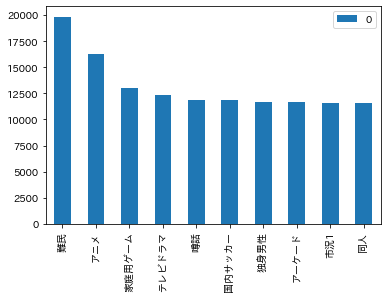

In [13]:
import matplotlib.pyplot as plt
import japanize_matplotlib

df_count[:10].plot(kind='bar')